<a href="https://colab.research.google.com/github/MirzaSaniya/Airbnb-Exploratory-Data-Analysis-Saniya-Mirza/blob/main/Airbnb_Exploratory_Data_Analysis_Saniya_Mirza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airbnb Exploratory Data Analysis Saniya Mirza**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.
# **Content**
This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.
Acknowledgements
# **This public dataset is part of Airbnb, and the original source can be found on this website.**
# **Inspiration**
•	What can we learn about different hosts and areas?

•	What can we learn from predictions? (ex: locations, prices, reviews, etc)

•	Which hosts are the busiest and why?

•	Is there any noticeable difference of traffic among different areas and what could be the reason for it?

•	Performed deep data exploration and analyzed popular listings and the busiest hosts based on metrics.



In [1]:
#Adjust the flag below according to your usage.
colab_flag = True
#Adjust the path below according to where you downloaded files
my_path = '/content/gdrive/My Drive/my work/'  #This remains unchanged for Colab users
my_path += 'airbnb nyc' #If you are using Colab, set this to the path that you unzipped your files

#If you are not using colab, update the path below:
if(colab_flag == False):
    my_path = 'the_path_that_you_unzipped_your_files' #Make your updates here
my_path

'/content/gdrive/My Drive/my work/airbnb nyc'

In [2]:
def initialize_path(is_colab, data_path):
  if(is_colab):
    from google.colab import drive
    drive.mount('/content/gdrive')
  %cd $data_path

In [ ]:
!ls

sample_data


In [3]:
#Execute this command only if you are using Colab
initialize_path(colab_flag, my_path)

Mounted at /content/gdrive
[Errno 2] No such file or directory: '/content/gdrive/My Drive/my work/airbnb nyc'
/content


In [ ]:
%ls

AB_NYC_2019.csv


In [ ]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [ ]:
airbnb = pd.read_csv('AB_NYC_2019.csv')
print (airbnb)

             id  ... availability_365
0          2539  ...              365
1          2595  ...              355
2          3647  ...              365
3          3831  ...              194
4          5022  ...                0
...         ...  ...              ...
48890  36484665  ...                9
48891  36485057  ...               36
48892  36485431  ...               27
48893  36485609  ...                2
48894  36487245  ...               23

[48895 rows x 16 columns]


In [ ]:
airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
#checking amount of rows in given dataset to understand the size we are working with
len(airbnb)

48895

In [ ]:
#checking type of every column in the dataset
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

After loading the dataset in and from the head of AB_2019_NYC dataset we can see a number of things. These 16 columns provide a very rich amount of information for deep data exploration we can do on this dataset. We do already see some missing values, which will require cleaning and handling of NaN values. Later, we may need to continue with mapping certain values to ones and zeros for predictive analytics.

# **Understadning, Wrangling and Cleaning Data**

---


Presenting the code and methods for acquiring the data. Loading the data into appropriate format for analysis. Explaining the process and results

In [ ]:
#after looking at the head of the dataset we already were able to notice some NaN values, therefore need to examine missing values further before continuing with analysis

#looking to find out first what columns have null values
#using 'sum' function will show us how many nulls are found in each column in dataset
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In our case, missing data that is observed does not need too much special treatment. Looking into the nature of our dataset we can state further things: columns "name" and "host_name" are irrelevant and insignificant to our data analysis, columns "last_review" and "review_per_month" need very simple handling. To elaborate, "last_review" is date; if there were no reviews for the listing - date simply will not exist. In our case, this column is irrelevant and insignificant therefore appending those values is not needed. For "review_per_month" column we can simply append it with 0.0 for missing values; we can see that in "number_of_review" that column will have a 0, therefore following this logic with 0 total reviews there will be 0.0 rate of reviews per month. Therefore, let's proceed with removing columns that are not important and handling of missing data.

In [ ]:
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
airbnb.drop(['id','host_name','last_review'], axis=1, inplace=True)
#examing the changes
airbnb.head(5)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Please note that we are dropping'host_name' not only because it is insignificant but also for ethical reasons. There should be no reasoning to continue data exploration and model training (which we will be doing later) towards specific individuals based on their names. Why is that? Those names are assigned to actual humans, also they present no security threat or military/governmental interest based on the nature of the dataset, therefore names are unimportant to us.

In [ ]:
#replacing all NaN values in 'reviews_per_month' with 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
airbnb.reviews_per_month.isnull().sum()

0

In [ ]:
#let's proceed with examing some interesting categorical unique values

#examining the unique values of n_group as this column will appear very handy for later analysis
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
#examining the unique values of neighbourhood as this column will appear very handy for later analysis
airbnb.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [ ]:
#examining the unique values of room_type as this column will appear very handy for later analysis
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Understanding unique values and categorical data that we have in our dataset was the last step we had to do. It looks like for those columns' values we will be doing some mapping to prepare the dataset for predictive analysis.


---



# **Exploring and Visualizing Data**

*Exploring the data by analyzing its statistics and visualizing the values of features and correlations between different features. Explaining the process and the results*


Now that we are ready for an exploration of our data, we can make a rule that we are going to be working from left to right. The reason some may prefer to do this is due to its set approach - some datasets have a big number of attributes, plus this way we will remember to explore each column individually to make sure we learn as much as we can about our dataset.

In [ ]:
#let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service
top_host=airbnb.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [ ]:
#coming back to our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'
top_host_check=airbnb.calculated_host_listings_count.max()
top_host_check

327

In [ ]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})

[Text(0, 0, '219517861'),
 Text(0, 0, '107434423'),
 Text(0, 0, '30283594'),
 Text(0, 0, '137358866'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '61391963'),
 Text(0, 0, '22541573'),
 Text(0, 0, '200380610'),
 Text(0, 0, '7503643')]

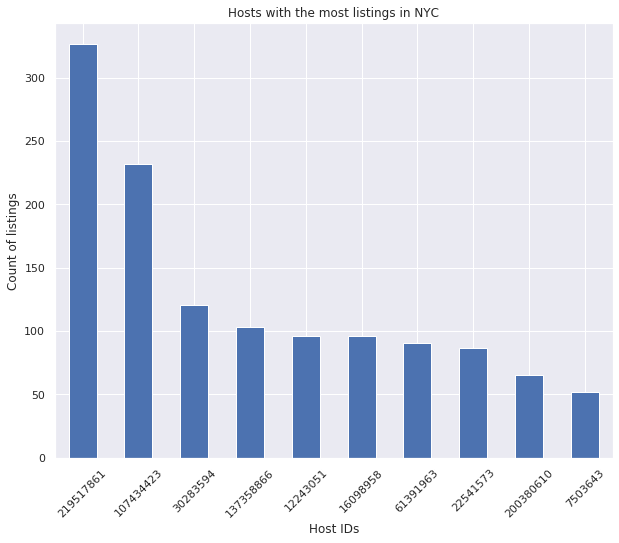

In [ ]:
viz_1=top_host.plot(kind='bar')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

Interesting, we can see that there is a good distribution between top 10 hosts with the most listings. First host has more than 300+ listings.

In [ ]:
#let's find out more about our neiberhoods presented 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'

#Brooklyn
sub_1=airbnb.loc[airbnb['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=airbnb.loc[airbnb['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=airbnb.loc[airbnb['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=airbnb.loc[airbnb['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=airbnb.loc[airbnb['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [ ]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

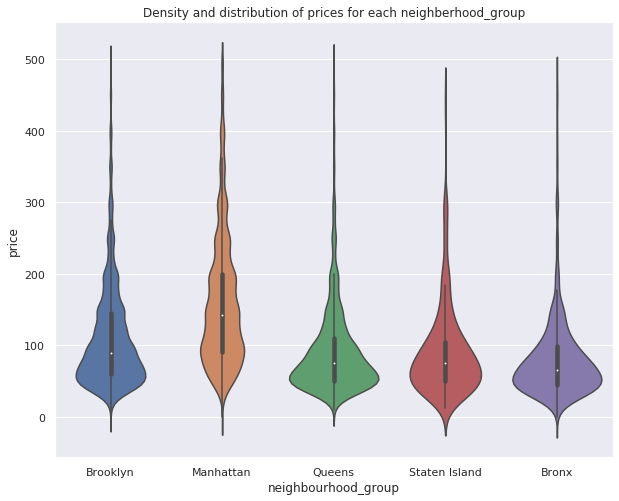

In [ ]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#creating a sub-dataframe with no extreme values / less than 500
sub_6=airbnb[airbnb.price < 500]
#using violinplot to showcase density and distribtuion of prices
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

Great, with a statistical table and a violin plot we can definitely observe a couple of things about distribution of prices for Airbnb in NYC boroughs. First, we can state that Manhattan has the highest range of prices for the listings with $150 price as average observation, followed by Brooklyn with \$90 per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.



In [ ]:
#as we saw earlier from unique values for neighbourhood there are way too many to concentrate on;
#therefore, let's grab just top 10 neighbourhoods that have the most listings in them

#finding out top 10 neighbourhoods
airbnb.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

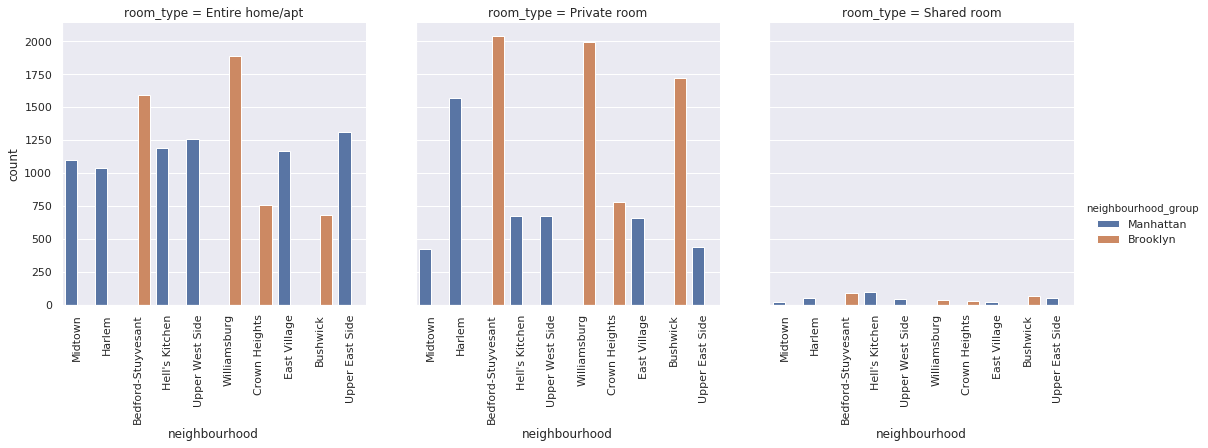

In [ ]:
#let's now combine this with our boroughs and room type for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

Amazing, but let' breakdown on what we can see from this plot. First, we can see that our plot consists of 3 subplots - that is the power of using catplot; with such output, we can easily proceed with comparing distributions among interesting attributes. Y and X axes stay exactly the same for each subplot, Y-axis represents a count of observations and X-axis observations we want to count. However, there are 2 more important elements: column and hue; those 2 differentiate subplots. After we specify the column and determined hue we are able to observe and compare our Y and X axes among specified column as well as color-coded. So, what do we learn from this? The observation that is definitely contrasted the most is that 'Shared room' type Airbnb listing is barely available among 10 most listing-populated neighborhoods. Then, we can see that for these 10 neighborhoods only 2 boroughs are represented: Manhattan and Brooklyn; that was somewhat expected as Manhattan and Brooklyn are one of the most traveled destinations, therefore would have the most listing availability. We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough, and Harlem for Brooklyn.



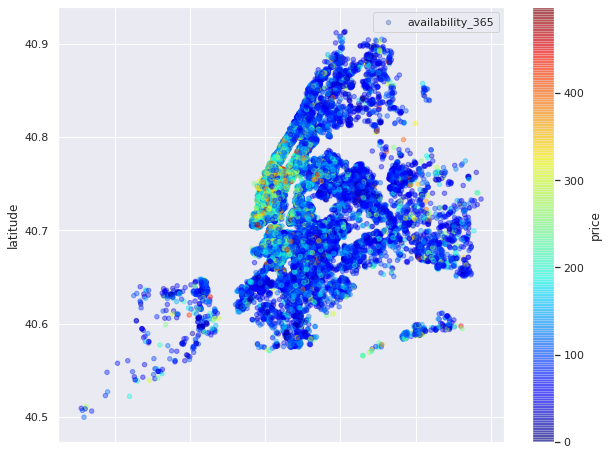

In [ ]:
#let's what we can do with our given longtitude and latitude columns

#let's see how scatterplot will come out
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

Good, scatterplot worked just fine to output our latitude and longitude points. However, it would be nice to have a map bellow for fully immersive heatmap in ourcase - let's see what we can do!



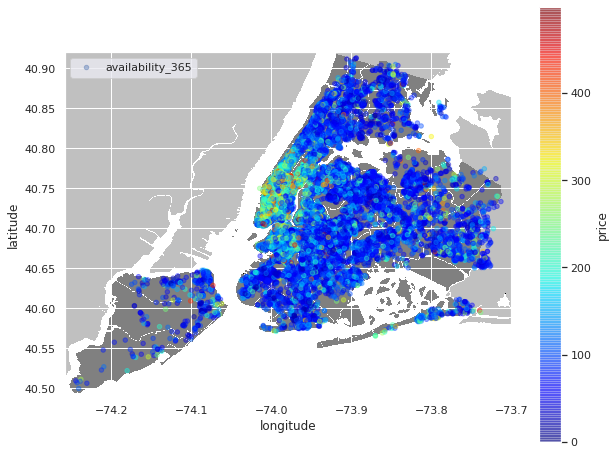

In [ ]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax,
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

Fantastic! After scaling our image the best we can, we observe that we end up with a very immersive heatmap. Using latitude and longitude points were able to visualize all NYC listings. Also, we added a color-coded range for each point on the map based on the price of the listing. However, it is important to note that we had to drop some extremely high values as they are treated as outliers for our analysis.



In [ ]:
#let's comeback now to the 'name' column as it will require litte bit more coding and continue to analyze it!

#initializing empty list where we are going to put our name strings
_names_=[]
#getting name strings from the column and appending it to the list
for name in airbnb.name:
    _names_.append(name)
#setting a function that will split those name strings into separate words
def split_name(name):
    spl=str(name).split()
    return spl
#initializing empty list where we are going to have words counted
_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

[Text(0, 0, 'in'),
 Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'the'),
 Text(0, 0, 'to'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'spacious'),
 Text(0, 0, '1'),
 Text(0, 0, 'with'),
 Text(0, 0, '2'),
 Text(0, 0, 'of'),
 Text(0, 0, 'east'),
 Text(0, 0, 'and'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, '&'),
 Text(0, 0, 'park'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'near'),
 Text(0, 0, 'williamsburg')]

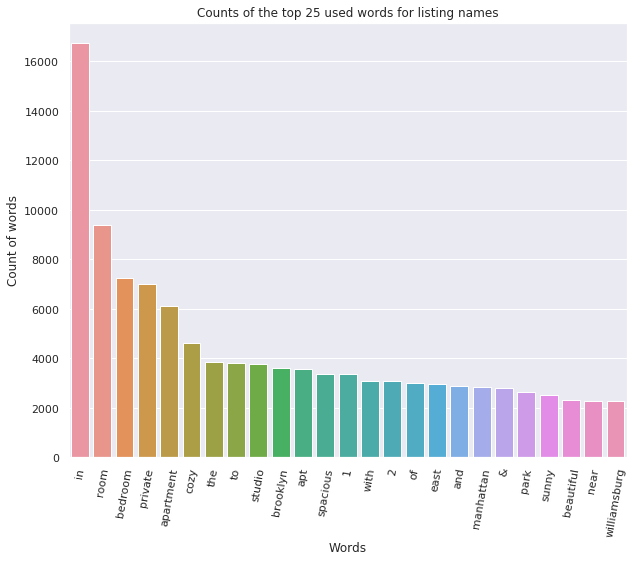

In [ ]:
#we are going to use counter
from collections import Counter
#let's see top 25 used words by host to name their listing
_top_25_w=Counter(_names_for_count_).most_common()
_top_25_w=_top_25_w[0:25]
#now let's put our findings in dataframe for further visualizations
sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)
#we are going to use barplot for this visualization
viz_5=sns.barplot(x='Words', y='Count', data=sub_w)
viz_5.set_title('Counts of the top 25 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

We can observe that finding out and going over top 25 used listings' name words - we are able to see one clear trend. It shows that hosts are simply describing their listing in a short form with very specific terms for easier search by a potential traveler. Such wors are 'room', 'bedroom', 'private', 'apartment', 'studio'. This shows that there are no catchphrases or 'popular/trending' terms that are used for names; hosts use very simple terms describing the space and the area where the listing is. This technique was somewhat expected as dealing with multilingual customers can be tricky and you definitely want to describe your space in a concise and understood form as much as possible.



In [ ]:
#last column we need to look at is 'number_of_reviews'

#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=airbnb.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [ ]:
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))


Average price per night: 65.4


There is no reason to visualize this as table format would be the most suitable output for better reading. From this table output, we can observe that top 10 most reviewed listings on Airbnb for NYC has price average of $65 with most of the listings under \$50, and 9/10 of them are 'Private room' type; top reviewed listing has 629 reviews.



# **Conclusion**

Summarizing our findings, suggesting other features

This Airbnb ('AB_NYC_2019') dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented. First, we have found hosts that take good advantage of the Airbnb platform and provide the most listings; we found that our top host has 327 listings. After that, we proceeded with analyzing boroughs and neighborhood listing densities and what areas were more popular than another. Next, we put good use of our latitude and longitude columns and used to create a geographical heatmap color-coded by the price of listings. Further, we came back to the first column with name strings and had to do a bit more coding to parse each title and analyze existing trends on how listings are named as well as what was the count for the most used words by hosts. Lastly, we found the most reviewed listings and analyzed some additional attributes. For our data exploration purposes, it also would be nice to have couple additional features, such as positive and negative numeric (0-5 stars) reviews or 0-5 star average review for each listing; addition of these features would help to determine the best-reviewed hosts for NYC along with 'number_of_review' column that is provided. Overall, we discovered a very good number of interesting relationships between features and explained each step of the process. This data analytics is very much mimicked on a higher level on Airbnb Data/Machine Learning team for better business decisions, control over the platform, marketing initiatives, implementation of new features and much more. Therefore, I hope this kernel helps everyone!

Performed deep data exploration for popular listings based on different attributes by geographical heatmap. Analyzed the trends by text analysis the busiest hosts based on metrics reviews.